## chapter2. supervised learning

- 지도학습, 교사학습
- 가장 널리, 가장 성공적으로 사용되는 머신러닝 방법
- 입력과 출력 샘플이 쌍으로 준비되어 있어야합니다.
- 출력 샘플을 만들기 위해서 사람의 노력이 필요합니다.

### 2.1 분류와 회귀
- 분류는 여러 클래스 레이블 중 하나를 예측(A,B,C)
- 회귀는 연속적인 숫자 예측( 내일 집값 1% 상승)
- 실제로는 분류나 회귀나 같은 원리입니다.

### 2.2 일반화, 과대적합, 과소적합
- 처음보는 데이터에 대해서도 잘 예측하면 모델이 훈련세트에서 테스트 세트로 일반화되었다. generalization(최적, 목표)
- 학습할때는 잘됐는데, 테스트셋에서는 예측이 잘 안된다 : 과대적합(overfitting)되었다.
- 학습도 잘 안되고, 테스트셋도 잘 안된다. : 과소적합(underfitting)되었다

### 2.3.1 예제에 사용할 데이터셋

In [5]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


(26, 2)


C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


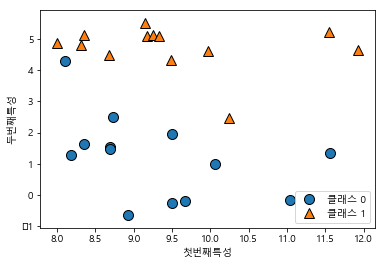

In [7]:
x, y = mglearn.datasets.make_forge()
plt.rc('font', family='Malgun Gothic')
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.legend(['클래스 0','클래스 1'], loc=4)
plt.xlabel('첫번째특성')
plt.ylabel('두번째특성')
print(x.shape)

Text(0, 0.5, '타깃')

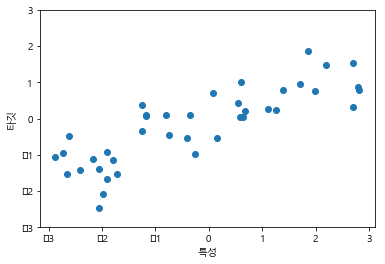

In [9]:
plt.rc('font', family='Malgun Gothic')
x, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(x, y, 'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')

In [12]:
from sklearn.datasets import load_breast_cancer


In [17]:
cancer = load_breast_cancer() # 병원에서 만든 유방암 환자들의 데이터
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
cancer.data.shape

(569, 30)

In [21]:
print({n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}) # 클래스별 샘플 개수

{'malignant': 212, 'benign': 357}


In [22]:
cancer.feature_names #특성 이름

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')





### 2.3.2 k-최근접이웃
훈련데이터셋에서 가장 가까운 데이터 포인트 즉 최근접 이웃을 찾습니다.

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


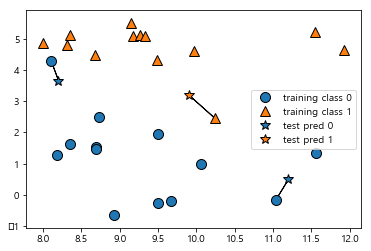

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


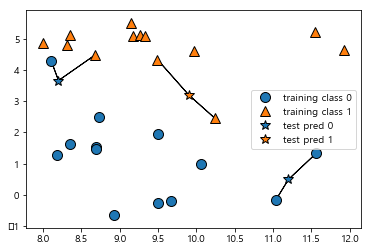

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [28]:
#유방암 분류 KNN classifier / 회귀 knn regressor 

In [29]:
import sklearn.datasets as datasets

In [30]:
cancer = datasets.load_breast_cancer()

In [31]:
cancer.data.shape, cancer.target_names

((569, 30), array(['malignant', 'benign'], dtype='<U9'))

In [32]:
cancer.target_names = ['악성','양성']
cancer.target_names

['악성', '양성']

In [33]:
# 모델이 믿을 수 있는지 테스트 해봐야 하므로 데이터를 75%학습용, 25%는 테스트용
# knn classifier로 분류

In [34]:
from sklearn.model_selection import train_test_split 

In [35]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [37]:
df = pd.DataFrame(x_train, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
1,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.930,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382
2,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,16.970,19.14,113.10,861.5,0.1235,0.25500,0.21140,0.12510,0.3153,0.08960
3,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,...,10.510,19.16,65.74,335.9,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178
4,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.060,24.54,70.76,375.4,0.1413,0.10440,0.08423,0.06528,0.2213,0.07842


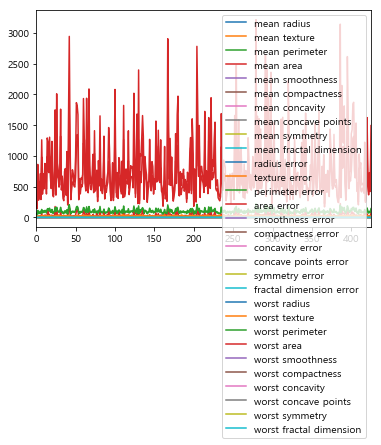

In [38]:
plt.rc('font', family='Malgun Gothic')
p= df.plot()

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [86]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

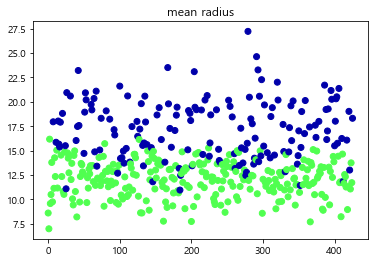

In [87]:
p = plt.title(cancer.feature_names[0])
plt.scatter(np.arange(len(x_train)), x_train[:,0], c=y_train, cmap=mglearn.cm3)

In [88]:
print('학습셋', knn.score(x_train, y_train))
print('테스트셋', knn.score(x_test, y_test))

학습셋 0.9413145539906104
테스트셋 0.9230769230769231
